In [3]:
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
! pip install -q jmd_imagescraper
# these have the functionality to scrap images
from jmd_imagescraper.core import *
# to instantiate a concrete path
from pathlib import Path
#Using the image cleaner within the notebook to clean up the dataset and delete unsuitable images.
from jmd_imagescraper.imagecleaner import *

In [18]:
# ! pip install pyqtwebengine pyqt5==5.12.3 spyder

In [25]:
snake_types = ["Northern Watersnake","Western Diamondback rattlesnake"]

# assisgn to the current working directory
path = Path().cwd()/"snake_types"

In [21]:
path 

Path('C:/Users/Hanh/Downloads/F21/Rizk DS/snake classification/snake_types')

In [19]:
# It gets the path, name of the directory, name to be searched and size
#duckduckgo_search(path, "plain bellied water","plain bellied water snake Nerodia erythrogaster", max_results=500)
#duckduckgo_search(path, "northern cottonmouth","northern cottonmouth", max_results=500)

In [ ]:
#display_image_cleaner("C:/Users/Hanh/Downloads/F21/Rizk DS/snake classification/snake_types")

In [26]:
snake_types = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)


In [27]:
dls = snake_types.dataloaders('./snake_types')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [29]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy])
learn.fine_tune(12)

epoch,train_loss,valid_loss,accuracy,time
0,0.576644,0.198932,0.944056,03:43


epoch,train_loss,valid_loss,accuracy,time
0,0.352846,0.142450,0.949650,04:37
1,0.289832,0.140716,0.956643,04:40
2,0.224014,0.162012,0.941259,04:53
3,0.182962,0.137392,0.953846,04:59
4,0.153168,0.165288,0.958042,04:48
5,0.127767,0.139706,0.966434,04:53
6,0.113732,0.134214,0.962238,04:45
7,0.090257,0.125970,0.963636,04:30
8,0.069801,0.114795,0.970629,04:33
9,0.062210,0.113039,0.972028,04:38


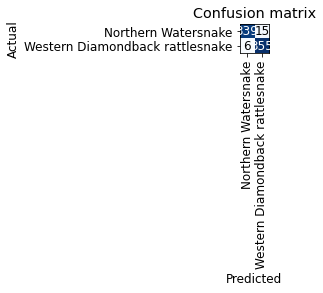

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [32]:
learn.path = Path('./saved_pkl')
learn.export("snake.pkl")

In [34]:
interp

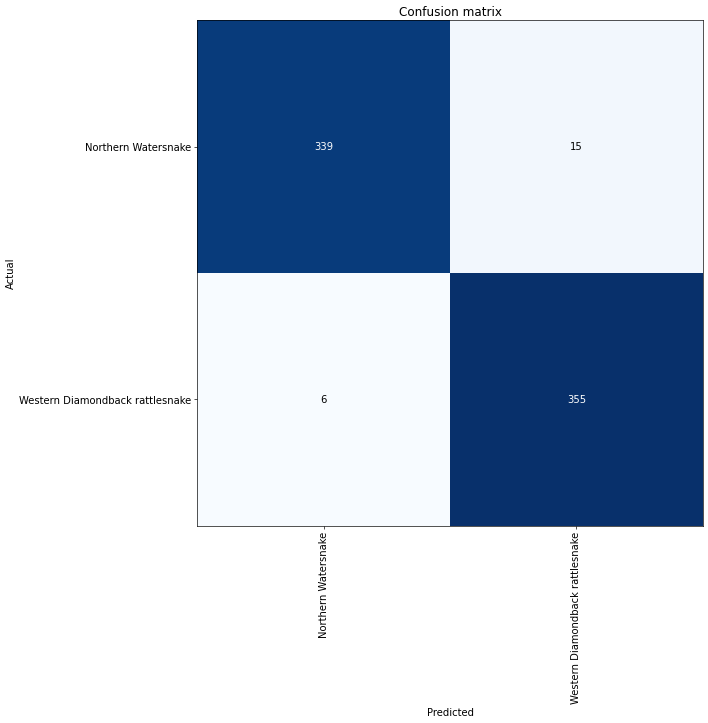

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)